<a href="https://colab.research.google.com/github/Ayman-queen/data-science-internship-advanced-tasks/blob/main/Task_3_Health_Monitoring_System_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart Disease Prediction Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Obesity Prediction Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



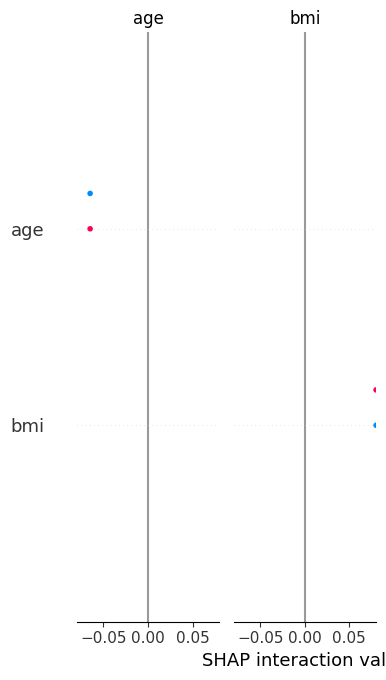

✅ Heart SHAP plot saved


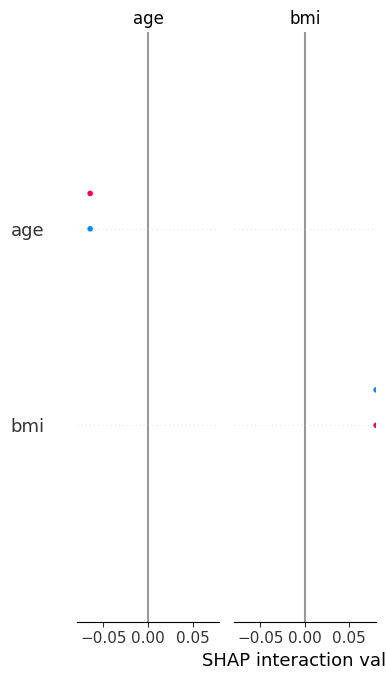

✅ Obesity SHAP plot saved
✅ PDF generated successfully: /content/Health_Report_Final.pdf


In [8]:
# ✅ Install Libraries (only once)
!pip install shap fpdf matplotlib scikit-learn pandas --quiet

# ✅ Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from fpdf import FPDF
import warnings

warnings.filterwarnings("ignore")

# ✅ Create Sample Data
data = pd.DataFrame({
    'age': [25, 45, 35, 50],
    'bmi': [22.5, 30.1, 27.4, 35.0],
    'bp': [120, 140, 135, 160],
    'cholesterol': [180, 220, 210, 250],
    'heart_disease': [0, 1, 1, 0],
    'obesity': [0, 1, 1, 0]
})

X = data[['age', 'bmi', 'bp', 'cholesterol']]
y_heart = data['heart_disease']
y_obesity = data['obesity']

# ✅ Split Data
X_train, X_test, y_train_heart, y_test_heart = train_test_split(X, y_heart, test_size=0.5, random_state=42)
_, _, y_train_obesity, y_test_obesity = train_test_split(X, y_obesity, test_size=0.5, random_state=42)

# ✅ Train Models
heart_model = RandomForestClassifier(random_state=42)
heart_model.fit(X_train, y_train_heart)

obesity_model = RandomForestClassifier(random_state=42)
obesity_model.fit(X_train, y_train_obesity)

# ✅ Predictions
y_pred_heart = heart_model.predict(X_test)
y_pred_obesity = obesity_model.predict(X_test)

# ✅ Reports
heart_report = classification_report(y_test_heart, y_pred_heart)
obesity_report = classification_report(y_test_obesity, y_pred_obesity)

print("Heart Disease Prediction Report:\n", heart_report)
print("Obesity Prediction Report:\n", obesity_report)

# ✅ SHAP for Heart
explainer_heart = shap.TreeExplainer(heart_model)
shap_values_heart = explainer_heart.shap_values(X_test)
heart_matrix = shap_values_heart[1] if isinstance(shap_values_heart, list) else shap_values_heart

# ✅ Plot & Save Heart SHAP
shap.summary_plot(heart_matrix, X_test, plot_type='bar')
plt.savefig("/content/heart_shap_plot.png")
plt.close()
print("✅ Heart SHAP plot saved")

# ✅ SHAP for Obesity
explainer_obesity = shap.TreeExplainer(obesity_model)
shap_values_obesity = explainer_obesity.shap_values(X_test)
obesity_matrix = shap_values_obesity[1] if isinstance(shap_values_obesity, list) else shap_values_obesity

# ✅ Plot & Save Obesity SHAP
shap.summary_plot(obesity_matrix, X_test, plot_type='bar')
plt.savefig("/content/obesity_shap_plot.png")
plt.close()
print("✅ Obesity SHAP plot saved")

# ✅ Generate PDF Report
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

pdf.multi_cell(0, 10, "Heart Disease Prediction Report:\n\n" + heart_report)
pdf.multi_cell(0, 10, "Obesity Prediction Report:\n\n" + obesity_report)
pdf.multi_cell(0, 10, "Recommendations:\n- Maintain healthy BMI\n- Exercise regularly\n- Monitor blood pressure\n- Avoid high cholesterol\n- Schedule regular checkups")

pdf.image("/content/heart_shap_plot.png", x=10, w=180)
pdf.ln(10)
pdf.image("/content/obesity_shap_plot.png", x=10, w=180)

pdf_path = "/content/Health_Report_Final.pdf"
pdf.output(pdf_path)

print("✅ PDF generated successfully:", pdf_path)